In [53]:
import pandas as pd
import numpy as np
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
Cdata=pd.read_csv("Company_Data.csv")
Cdata.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [12]:
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
Cdata["Urban"]=lm.fit_transform(Cdata["Urban"])
Cdata["US"]=lm.fit_transform(Cdata["US"])
Cdata["ShelveLoc"]=lm.fit_transform(Cdata["ShelveLoc"])

In [13]:
Cdata.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1


In [14]:
Cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    category
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    int32   
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    int64   
 10  US           400 non-null    int64   
dtypes: category(1), int32(1), int64(9)
memory usage: 41.3 KB


In [39]:
Cdata["Sales"]=Cdata["Sales"].astype('category') # converting the sales (float value to categorical variable)

In [37]:
Cdata["Sales"]

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [31]:
Cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    category
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    int32   
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    int64   
 10  US           400 non-null    int64   
dtypes: category(1), int32(1), int64(9)
memory usage: 41.3 KB


In [32]:
x=Cdata.iloc[:,1:]
y=Cdata.iloc[:,0]

In [33]:
# dividing the dataset into train and test datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=10)

 BULIDING THE DESCISION TREE CLASSIFIER USING ENTROPY CRITERIA :: 
 SINCE THE TARGET VARIABLE IS CONTINOUS WE USE DESICION TREE REGRESSOR

In [41]:
model=DecisionTreeRegressor(max_depth=3,random_state=10)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=10)

In [42]:
model.score(x_test,y_test)

0.2520630826091844

In [24]:
model.feature_importances_

array([0.06710315, 0.06996481, 0.07175501, 0.03900646, 0.27118735,
       0.35107646, 0.10148352, 0.01090651, 0.00967651, 0.00784021])

In [43]:
# use metrics
from sklearn import metrics
y_pred=model.predict(x_test)
y_pred

array([ 8.13479592,  5.80291667,  9.07942857,  5.80291667,  8.13479592,
        5.16294118,  9.07942857,  8.13479592,  8.13479592,  8.13479592,
        5.80291667,  9.07942857,  8.13479592,  8.13479592,  5.16294118,
        5.80291667,  5.80291667,  5.80291667,  5.80291667,  9.07942857,
        3.42105263,  8.13479592,  8.13479592,  5.16294118,  5.80291667,
        5.16294118,  8.13479592,  8.13479592,  8.13479592,  5.16294118,
       12.23909091,  8.13479592,  8.13479592,  9.07942857,  5.80291667,
        5.80291667, 12.23909091,  8.46818182,  8.13479592,  8.13479592,
       12.23909091,  5.16294118,  8.13479592,  8.13479592,  5.80291667,
        8.13479592,  8.13479592,  8.13479592,  8.13479592,  5.80291667,
        5.16294118,  9.07942857,  3.42105263,  9.07942857,  8.13479592,
       12.23909091,  9.07942857,  8.13479592,  9.07942857,  9.07942857,
        8.13479592,  5.16294118,  5.16294118,  5.80291667,  5.16294118,
        9.07942857,  9.07942857,  8.13479592,  8.13479592,  8.13

In [44]:
metrics.mean_squared_error(y_test,y_pred)

5.138516813251986

In [48]:
metrics.mean_absolute_percentage_error(y_test,y_pred)

0.29602471083993237

In [55]:
metrics.mean_absolute_error(y_test,y_pred) 

1.8680308071612

[Text(0.5, 0.875, 'X[5] <= 0.5\nsquared_error = 8.486\nsamples = 268\nvalue = 7.461'),
 Text(0.25, 0.625, 'X[4] <= 93.0\nsquared_error = 5.514\nsamples = 65\nvalue = 5.18'),
 Text(0.125, 0.375, 'X[1] <= 32.5\nsquared_error = 4.237\nsamples = 12\nvalue = 8.014'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 3.02'),
 Text(0.1875, 0.125, 'squared_error = 2.148\nsamples = 11\nvalue = 8.468'),
 Text(0.375, 0.375, 'X[3] <= 179.0\nsquared_error = 3.573\nsamples = 53\nvalue = 4.538'),
 Text(0.3125, 0.125, 'squared_error = 2.776\nsamples = 19\nvalue = 3.421'),
 Text(0.4375, 0.125, 'squared_error = 2.931\nsamples = 34\nvalue = 5.163'),
 Text(0.75, 0.625, 'X[5] <= 1.5\nsquared_error = 7.239\nsamples = 203\nvalue = 8.191'),
 Text(0.625, 0.375, 'X[4] <= 109.5\nsquared_error = 6.576\nsamples = 57\nvalue = 10.299'),
 Text(0.5625, 0.125, 'squared_error = 2.827\nsamples = 22\nvalue = 12.239'),
 Text(0.6875, 0.125, 'squared_error = 5.08\nsamples = 35\nvalue = 9.079'),
 Text(0.875, 0.3

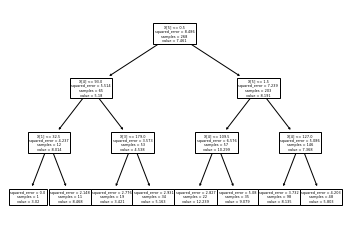

In [57]:
# lets plot a tree
plot_tree(model)

[Text(0.5, 0.875, 'ShelveLoc <= 0.5\nsquared_error = 8.486\nsamples = 268\nvalue = 7.461'),
 Text(0.25, 0.625, 'Price <= 93.0\nsquared_error = 5.514\nsamples = 65\nvalue = 5.18'),
 Text(0.125, 0.375, 'Income <= 32.5\nsquared_error = 4.237\nsamples = 12\nvalue = 8.014'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 3.02'),
 Text(0.1875, 0.125, 'squared_error = 2.148\nsamples = 11\nvalue = 8.468'),
 Text(0.375, 0.375, 'Population <= 179.0\nsquared_error = 3.573\nsamples = 53\nvalue = 4.538'),
 Text(0.3125, 0.125, 'squared_error = 2.776\nsamples = 19\nvalue = 3.421'),
 Text(0.4375, 0.125, 'squared_error = 2.931\nsamples = 34\nvalue = 5.163'),
 Text(0.75, 0.625, 'ShelveLoc <= 1.5\nsquared_error = 7.239\nsamples = 203\nvalue = 8.191'),
 Text(0.625, 0.375, 'Price <= 109.5\nsquared_error = 6.576\nsamples = 57\nvalue = 10.299'),
 Text(0.5625, 0.125, 'squared_error = 2.827\nsamples = 22\nvalue = 12.239'),
 Text(0.6875, 0.125, 'squared_error = 5.08\nsamples = 35\nvalue = 9.079

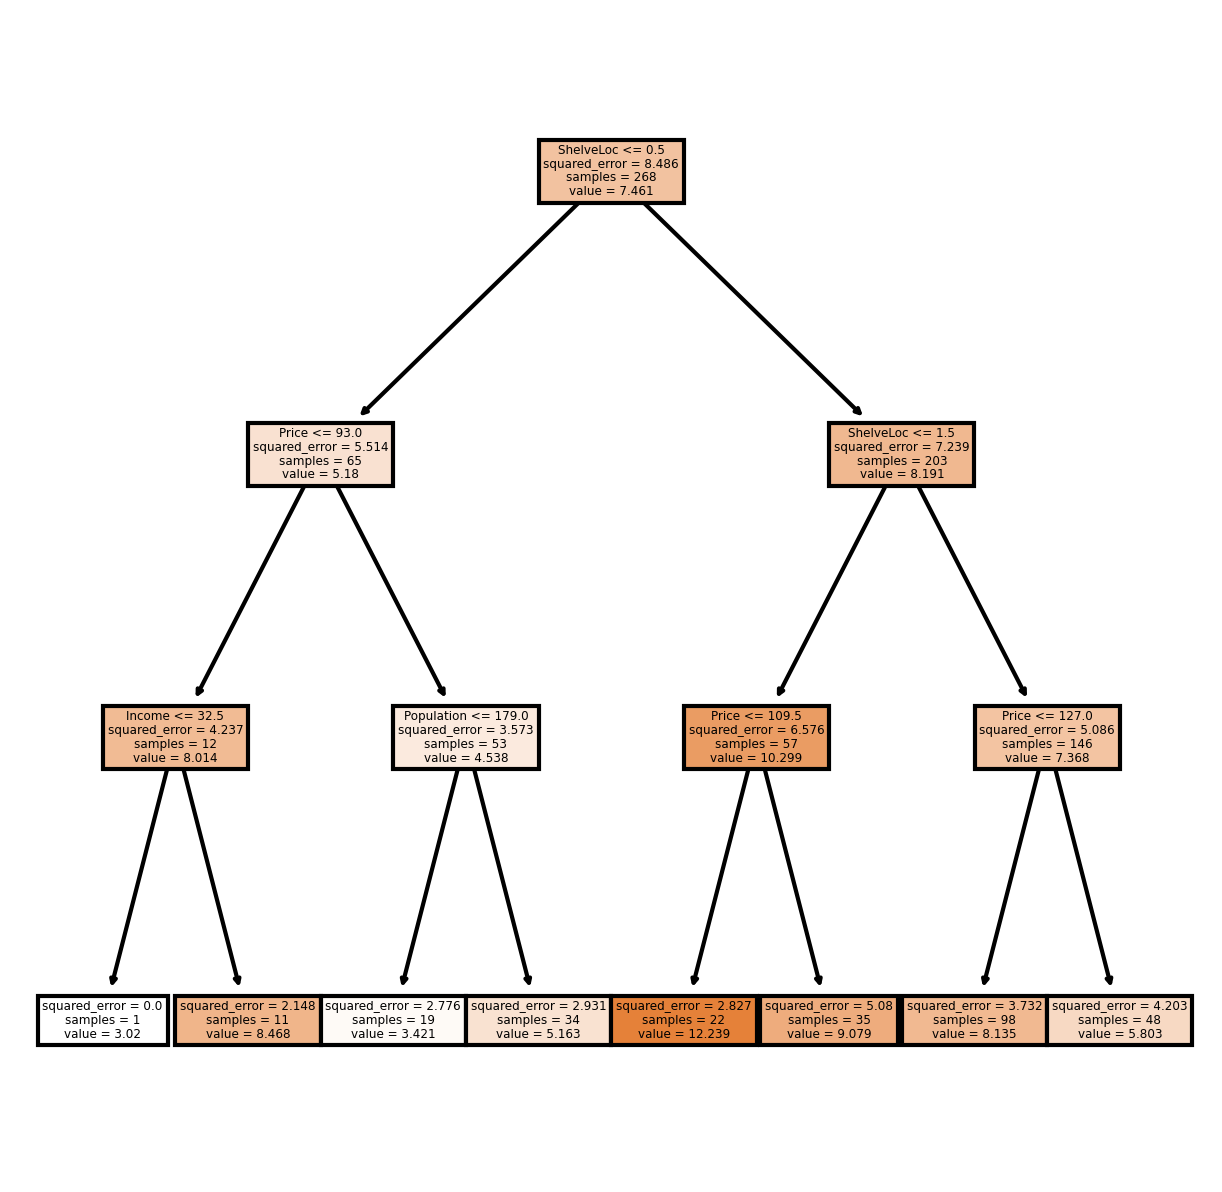

In [61]:
from sklearn import tree
fn=["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"]
cn=["Sales"]
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
tree.plot_tree(model,
              feature_names=fn,
              class_names=cn,
              filled=True)